In [88]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np


In [89]:
zip_path = tf.keras.utils.get_file(origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',fname = 'jena_climate_2009_2016.csv.zip' , extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [90]:
df = pd.read_csv(csv_path)

In [91]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [92]:
df = df[5::6]

In [93]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [94]:
df.shape

(70091, 15)

In [95]:
df.index = pd.to_datetime(df['Date Time'], format = '%d.%m.%Y %H:%M:%S')

In [96]:
df[:26] # we will focus on T(degC)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


In [97]:
temp = df['T (degC)']

<Axes: xlabel='Date Time'>

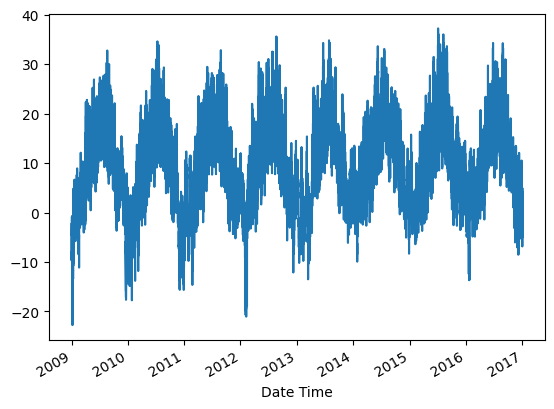

In [98]:
temp.plot()

In [99]:
# We need the data to be in 'input matrix format' - row + label
# for forecasting = look at last 5 hours => predict what the temperature is for the next hour
# look at temp 1-5 pm and predict for 6 pm
# then bump it over 2-6 pm and predict for 7 pm
# format:
#  input hours  prediction hour
# [[[1],[2],[3],[4],[5]]] [6]
# next row:
# [[[2],[3],[4],[5],[6]]] [7]
# next row:
# [[[3],[4],[5],[6],[7]]] [8]

# window_size = 3

# forecasting converted into supervised learning
# function to do the above:

In [100]:
# this is windowing function

def df_to_X_y(df,window_size = 5):
  df_as_np = df.to_numpy() # convert to numpy array
  X = [] # one at a time we add the above lists to X
  y = [] # one at a time we add the above labels to y
  for i in range(len(df_as_np)- window_size): # to prevent an error and not get out of bounds
    row = [[a] for a in df_as_np[i:i+5]] # whatever i is now => take it and the next 4
    X.append(row)
    label = df_as_np[i+5] # this is the 5 removed from the i
    y.append(label)
  return np.array(X), np.array(y)

In [101]:
WINDOW_SIZE = 5
X,y = df_to_X_y(temp, WINDOW_SIZE)
print(X.shape, y.shape)

(70086, 5, 1) (70086,)


In [102]:
# Let's take a look at the converted data:
X[0]

array([[-8.05],
       [-8.88],
       [-8.81],
       [-9.05],
       [-9.63]])

In [103]:
# splitting the data:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(60000, 5, 1) (60000,)
(5000, 5, 1) (5000,)
(5086, 5, 1) (5086,)


In [104]:
# the above shows (samples, window size, features)
# building the model:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * # import all
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError # MSE is the loss function of choice in these tasks
from tensorflow.keras.metrics import RootMeanSquaredError # sqrt of mse
from tensorflow.keras.optimizers import Adam

In [105]:
# defining the model:

model = Sequential()
model.add(InputLayer((WINDOW_SIZE,1)))
model.add(LSTM(128))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'linear')) # we wish a linear value because our prediction is a temperature

In [106]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               66560     
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 70721 (276.25 KB)
Trainable params: 70721 (276.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


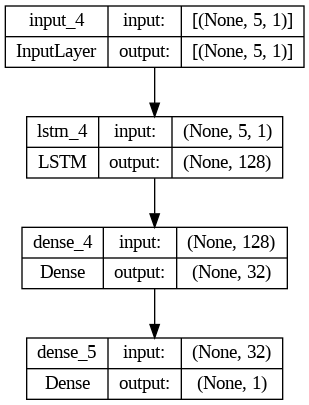

In [107]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [108]:
# specifying checkpoints:
cp = ModelCheckpoint('best_model/', save_best_only = True ) # the model with lowest loss

In [109]:
model.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [110]:
model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10, callbacks = [cp])

Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 14.4437 - root_mean_squared_error: 3.8005 - val_loss: 0.7674 - val_root_mean_squared_error: 0.8760
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.8944 - root_mean_squared_error: 0.9457 - val_loss: 0.5826 - val_root_mean_squared_error: 0.7633
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.7257 - root_mean_squared_error: 0.8519 - val_loss: 0.5266 - val_root_mean_squared_error: 0.7257
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.6804 - root_mean_squared_error: 0.8248 - val_loss: 0.5075 - val_root_mean_squared_error: 0.7124
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.6584 - root_mean_squared_error: 0.8114 - val_loss: 0.5027 - val_root_mean_squared_error: 0.7090
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.6546 - root_mean_squared_error: 0.8091 

In [111]:
from tensorflow.keras.models import load_model

In [112]:
model = load_model('best_model/')

In [113]:
# lets make a pandas dataframe and compare predictions vs 'labels'

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame( data = {'Train Predictions': train_predictions, 'Actuals': y_train})

1875/1875 [==============================] - 8s 4ms/step


In [114]:
# lets take a look at the train results:
train_results

,Train Predictions,Actuals
0,-10.048742,-9.67
1,-9.854574,-9.17
2,-8.921614,-8.10
3,-7.417161,-7.66
4,-7.324202,-7.04
...,...,...
59995,6.191428,6.07
59996,7.312841,9.88
59997,11.974429,13.53
59998,15.695376,15.43


In [115]:
import matplotlib.pyplot as plt

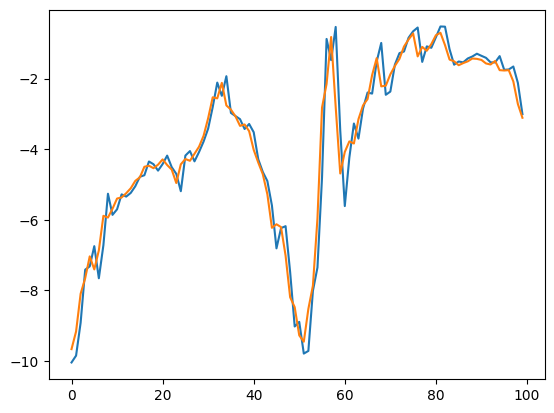

In [116]:
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])

In [117]:
# The model follows the data very well
# let's see how well it did on the validation, since we don't really care about the training data

val_predictions = model.predict(X_val).flatten()
val_results = pd.DataFrame( data = {'Val Predictions': val_predictions, 'Actuals': y_val})
val_results

157/157 [==============================] - 1s 4ms/step


,Val Predictions,Actuals
0,15.271070,14.02
1,13.084170,13.67
2,13.052739,12.27
3,11.462572,11.19
4,10.403086,10.85
...,...,...
4995,17.324923,18.27
4996,17.446514,17.85
4997,17.202579,16.65
4998,15.869535,15.85


<Axes: >

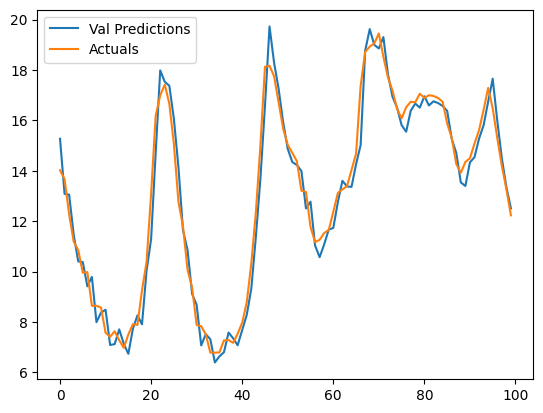

In [118]:
val_results[:100].plot()

In [119]:
# and now the testing data:
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame( data = {'Test Predictions': test_predictions, 'Actuals': y_test})
test_results

159/159 [==============================] - 1s 4ms/step


,Test Predictions,Actuals
0,14.396062,13.99
1,13.220762,13.46
2,12.854607,12.93
3,12.432530,12.43
4,11.986105,12.17
...,...,...
5081,-0.908844,-0.98
5082,-1.340566,-1.40
5083,-1.584620,-2.75
5084,-3.175391,-2.89


<Axes: >

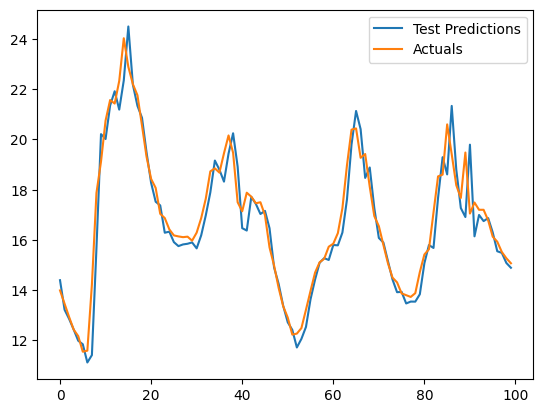

In [120]:
test_results[:100].plot()